In [1]:
import pandas as pd
import numpy as np
import sqlalchemy
from sqlqueries_unc_preeclampsia import *
import os
import dotenv

### 1. load bp data

In [2]:
dotenv.load_dotenv()
connection_string = f"mssql+pymssql://@{os.getenv('HOSTNAME')}/{os.getenv('DATABASE')}"
engine = sqlalchemy.create_engine(connection_string)
sql_string = f'''
select
    *
from {os.getenv('DATABASE')}.{os.getenv('SCHEMA')}.rpt_preeclampsia__bp_time_series
'''
dat = pd.read_sql(sql_string, con=engine)

In [3]:
dat_with_chtn_any = dat[dat['chtn_any']==1].groupby(['cp_anypree_sf', 'preg_weeks'])[['systolic', 'diastolic']].agg(['mean', 'std']).reset_index()
dat_without_chtn_any = dat[dat['chtn_any']==0].groupby(['cp_anypree_sf', 'preg_weeks'])[['systolic', 'diastolic']].agg(['mean', 'std']).reset_index()
dat_with_chtn_any

cp_anypree_sf preg_weeks    systolic             diastolic           
                                   mean        std       mean        std
0              0          0  128.479365  12.773107  81.615873  11.959092
1              0          1  132.339024  12.571880  84.265854   9.810837
2              0          2  133.985653  16.729732  80.298948  11.345732
3              0          3  134.677202  12.894517  83.979226  10.080948
4              0          4  133.654419  14.431229  82.397455  10.952965
5              0          5  134.236147  14.782765  80.763683  10.488507
6              0          6  131.329928  12.335439  78.016979   9.627714
7              0          7  130.313325  11.733740  78.229388   9.425790
8              0          8  130.515783  11.982955  77.783416   9.884565
9              0          9  129.869826  12.932705  77.562550   9.881453
10             0         10  131.078592  12.908209  78.422842   9.836909
11             0         11  130.758010  12.468475  77.853415  10.347194
12             0         12  129.695124  12.416658  78.071029   8.974220
13             0         13  129.978007  12.796322  77.365742  10.317653
14             0         14  129.015670  12.670933  76.144798   9.620398
15             0         15  128.800754  11.847277  75.943187  10.305510
16             0         16  128.190911  10.979988  76.760065   9.275922
17             0         17  128.113113  12.183272  76.525975   8.298432
18             0         18  127.507904  11.402236  75.385749   9.478002
19             0         19  128.246762  12.426679  75.473201   8.593622
20             0         20  127.482641  12.438977  74.844550   8.749037
21             1          0  138.003922  22.337086  84.725490  14.314055
22             1          1  132.988093  17.477614  86.248335  15.787847
23             1          2  139.228697  12.063796  85.764787  12.835705
24             1          3  134.024271  21.600165  83.230152  11.226716
25             1          4  140.736551  19.271757  88.387387  13.279774
26             1          5  137.734128  15.972543  84.931325  12.914076
27             1          6  135.068571  14.160881  81.197781  10.217600
28             1          7  135.893903  15.580412  81.043594  11.870069
29             1          8  134.297979  14.126524  80.621129  11.686644
30             1          9  136.699815  13.017386  81.611387  10.929518
31             1         10  136.396622  12.360666  81.336356  11.541729
32             1         11  133.190559  12.405848  79.164278  10.258893
33             1         12  134.501201  13.529232  79.907992   9.654584
34             1         13  135.600398  14.445121  79.752542  12.815286
35             1         14  133.706519  14.092861  79.017546   9.878415
36             1         15  132.944666  13.326535  78.371741  10.839612
37             1         16  132.333878  12.701355  79.871076  10.896524
38             1         17  132.416378  14.562215  78.642204  10.408947
39             1         18  131.933071  12.555138  78.037464  10.593569
40             1         19  133.002332  12.114099  77.354565  12.015406
41             1         20  131.418597  13.780740  78.340090  10.804596

Text(0.5, 0.98, 'chtn_any=1')

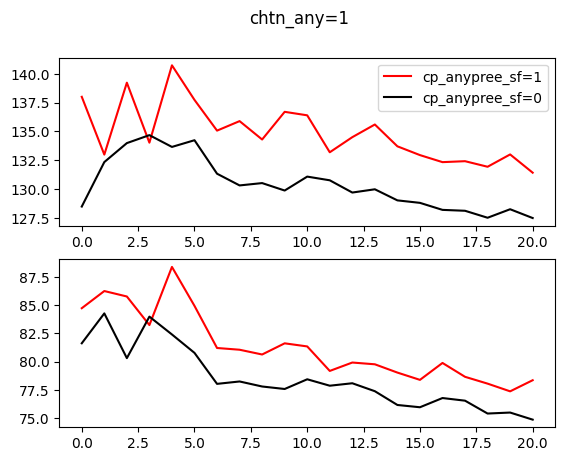

In [4]:
from matplotlib import pyplot as plt

idx = (dat_with_chtn_any['cp_anypree_sf'] == 1)
fig, axes = plt.subplots(2,1)
axes = axes.flatten()
axes[0].plot(dat_with_chtn_any.loc[idx, 'preg_weeks'], dat_with_chtn_any.loc[idx, ('systolic', 'mean')], 'r-', label='cp_anypree_sf=1')
axes[0].plot(dat_with_chtn_any.loc[~idx, 'preg_weeks'], dat_with_chtn_any.loc[~idx, ('systolic', 'mean')], 'k-', label='cp_anypree_sf=0')
axes[1].plot(dat_with_chtn_any.loc[idx, 'preg_weeks'], dat_with_chtn_any.loc[idx, ('diastolic', 'mean')], 'r-')
axes[1].plot(dat_with_chtn_any.loc[~idx, 'preg_weeks'], dat_with_chtn_any.loc[~idx, ('diastolic', 'mean')], 'k-')
axes[0].legend()
plt.suptitle('chtn_any=1')

Text(0.5, 0.98, 'chtn_any=0')

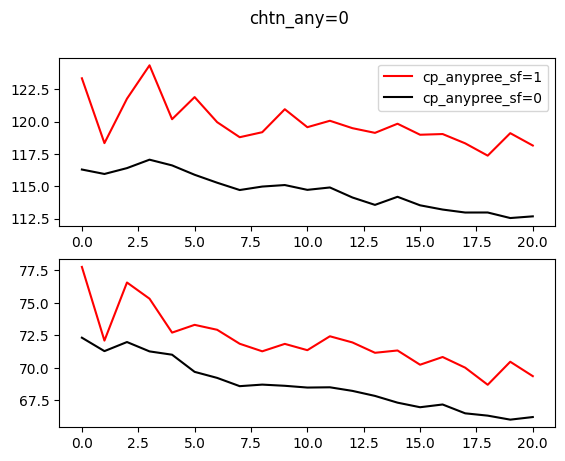

In [5]:
idx = (dat_without_chtn_any['cp_anypree_sf'] == 1)
fig, axes = plt.subplots(2,1)
axes = axes.flatten()
axes[0].plot(dat_without_chtn_any.loc[idx, 'preg_weeks'], dat_without_chtn_any.loc[idx, ('systolic', 'mean')], 'r-', label='cp_anypree_sf=1')
axes[0].plot(dat_without_chtn_any.loc[~idx, 'preg_weeks'], dat_without_chtn_any.loc[~idx, ('systolic', 'mean')], 'k-', label='cp_anypree_sf=0')
axes[1].plot(dat_without_chtn_any.loc[idx, 'preg_weeks'], dat_without_chtn_any.loc[idx, ('diastolic', 'mean')], 'r-')
axes[1].plot(dat_without_chtn_any.loc[~idx, 'preg_weeks'], dat_without_chtn_any.loc[~idx, ('diastolic', 'mean')], 'k-')
axes[0].legend()
plt.suptitle('chtn_any=0')

Text(0.5, 1.0, 'chtn_any=1')

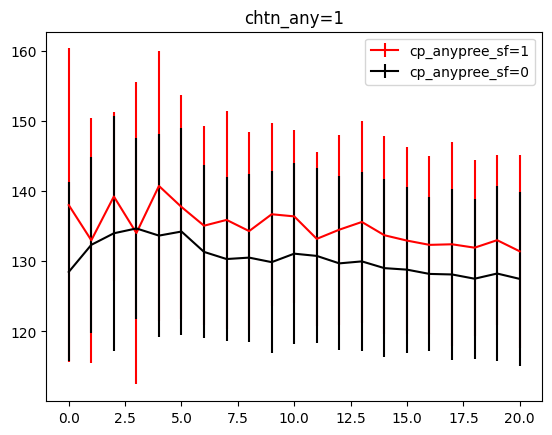

In [6]:
from matplotlib import pyplot as plt

idx = (dat_with_chtn_any['cp_anypree_sf'] == 1)
plt.errorbar(dat_with_chtn_any.loc[idx, 'preg_weeks'], 
                dat_with_chtn_any.loc[idx, ('systolic', 'mean')],
                dat_with_chtn_any.loc[idx, ('systolic', 'std')],
                fmt='r-', label='cp_anypree_sf=1')
plt.errorbar(dat_with_chtn_any.loc[~idx, 'preg_weeks'], 
                dat_with_chtn_any.loc[~idx, ('systolic', 'mean')],
                dat_with_chtn_any.loc[~idx, ('systolic', 'std')],
                fmt='k-', label='cp_anypree_sf=0')
plt.legend()
plt.title('chtn_any=1')